In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

In [2]:
df = pd.read_csv("Ecommerce Customers.csv")
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# Understand Data

In [3]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
# check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# describe num
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
# describe cat
cat_cols = df.select_dtypes(include="O").columns

for col in cat_cols:
    print(f"number of uniques '{col}' columns: {df[col].nunique()}")
    print(f"uniques  '{col}' columns: \n{df[col].unique()}")
    print()
    print()
    print("*" * 50)

number of uniques 'Email' columns: 500
uniques  'Email' columns: 
['mstephenson@fernandez.com' 'hduke@hotmail.com' 'pallen@yahoo.com'
 'riverarebecca@gmail.com' 'mstephens@davidson-herman.com'
 'alvareznancy@lucas.biz' 'katherine20@yahoo.com' 'awatkins@yahoo.com'
 'vchurch@walter-martinez.com' 'bonnie69@lin.biz' 'andrew06@peterson.com'
 'ryanwerner@freeman.biz' 'knelson@gmail.com' 'wrightpeter@yahoo.com'
 'taylormason@gmail.com' 'jstark@anderson.com' 'wjennings@gmail.com'
 'rebecca45@hale-bauer.biz' 'alejandro75@hotmail.com'
 'samuel46@love-west.net' 'megan33@gmail.com' 'agolden@yahoo.com'
 'vstafford@hotmail.com' 'denise22@hernandez-townsend.com'
 'youngbarbara@yahoo.com' 'william25@mcconnell.com'
 'ijones@schaefer-carr.net' 'heatherhall@yahoo.com'
 'tinasmith@martinez.info' 'chasejennifer@hotmail.com'
 'jenniferbarnett@gmail.com' 'jared39@hotmail.com'
 'briancarlson@page-fleming.com' 'joshuaodom@gmail.com'
 'vickie90@lee-wilson.com' 'duane56@hotmail.com' 'enash@gmail.com'
 'sandrahar

# Feature Extraction + EDA

In [7]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [8]:
# drop irrelevent features
df.drop(['Email', 'Address'], axis=1, inplace=True)
df

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...
495,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [9]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Avg. Session Length'}>,
        <Axes: title={'center': 'Time on App'}>],
       [<Axes: title={'center': 'Time on Website'}>,
        <Axes: title={'center': 'Length of Membership'}>],
       [<Axes: title={'center': 'Yearly Amount Spent'}>, <Axes: >]],
      dtype=object)

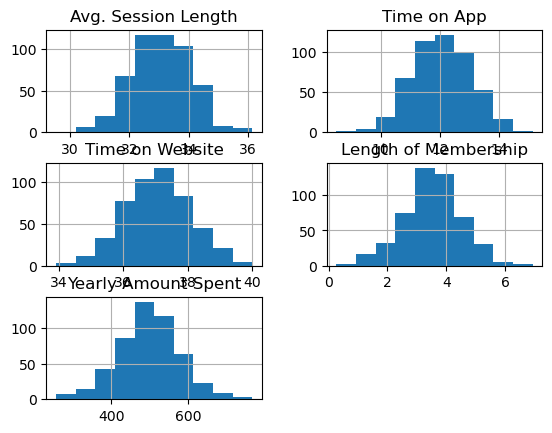

In [10]:
df.hist()

<Axes: xlabel='Length of Membership', ylabel='Count'>

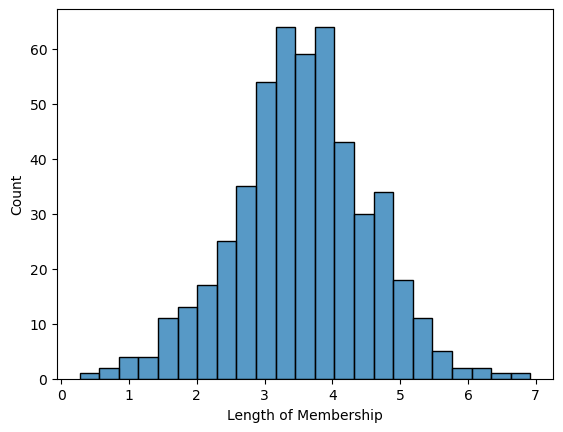

In [11]:
# length_of_member_ship is the most important feature
sns.histplot(x=df['Length of Membership'])

<Axes: xlabel='member_cat', ylabel='count'>

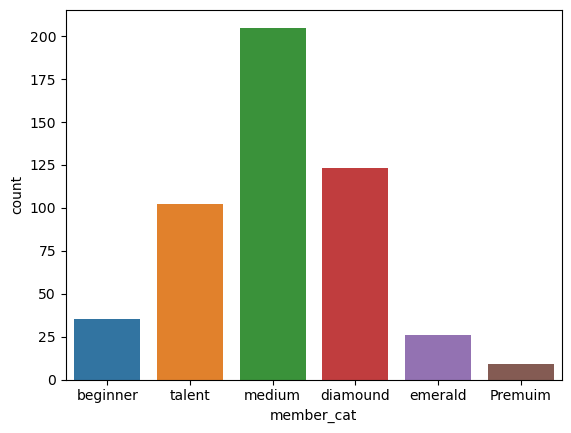

In [12]:
df['member_cat'] = pd.cut(x=df['Length of Membership'],
        bins=[0.0, 2.0, 3.0, 4.0, 5.0, 5.5, np.inf],
        labels=['beginner', 'talent', 'medium', 'diamound', 'emerald', 'Premuim'])
sns.countplot(x=df['member_cat'])

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop('Yearly Amount Spent', axis=1)
y = df['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True, stratify=df['member_cat'])
x_train

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,member_cat
64,SpringGreen,32.772610,13.276313,36.600777,3.462299,medium
430,BlanchedAlmond,33.749228,11.137140,38.401374,4.595523,diamound
202,Teal,31.525752,11.340036,37.039514,3.811248,medium
195,LightSkyBlue,31.820998,10.771074,37.278640,3.519032,medium
89,FireBrick,32.605584,12.068816,36.105000,3.917451,medium
...,...,...,...,...,...,...
55,GreenYellow,33.925297,11.588655,35.252242,3.392050,medium
449,OliveDrab,32.675155,12.594194,37.683875,2.571778,talent
199,DarkMagenta,30.836433,13.100110,35.907721,3.361613,medium
356,Orchid,33.672758,13.420546,37.763690,4.794312,diamound


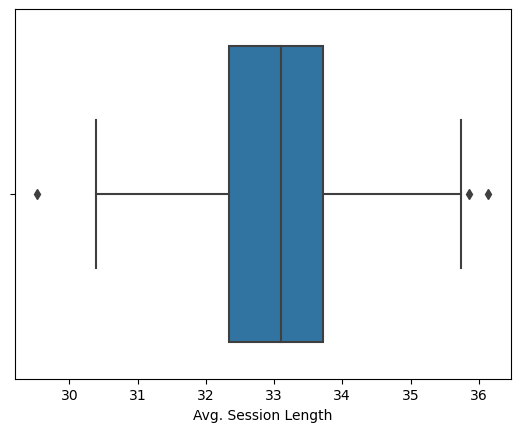

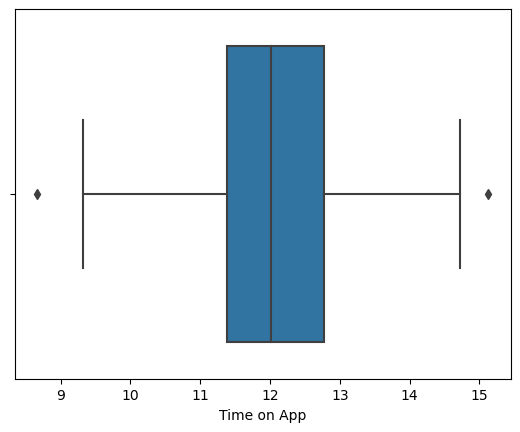

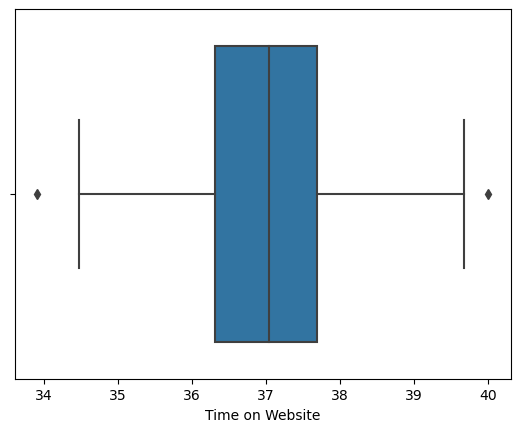

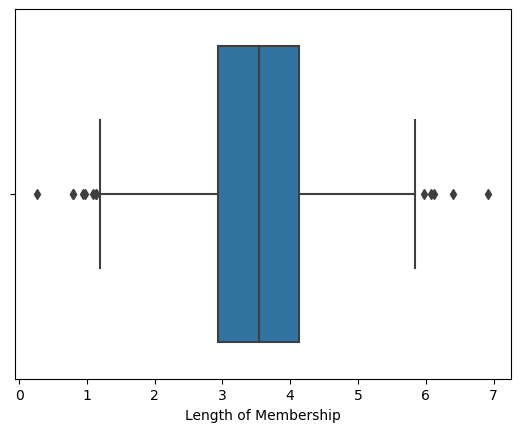

In [14]:
num_cols = x_train.select_dtypes(include='number').columns
for col in num_cols:
    sns.boxplot(x=x_train[col])
    plt.show()

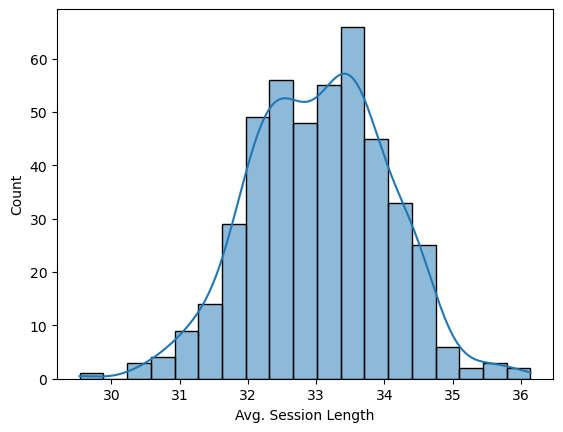

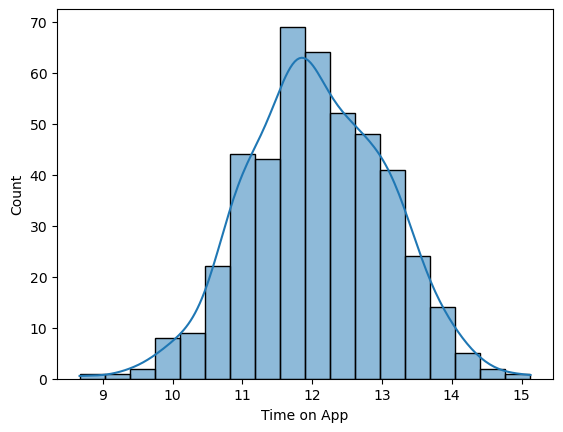

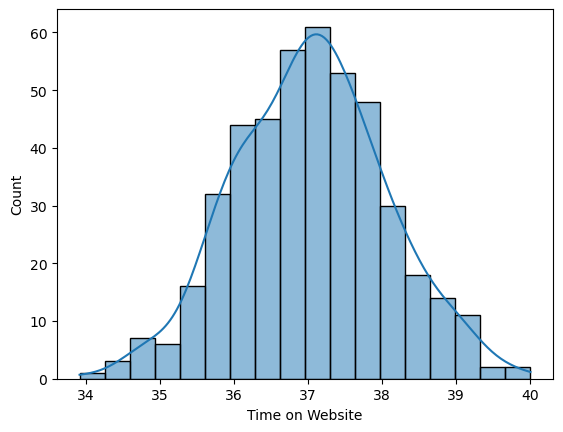

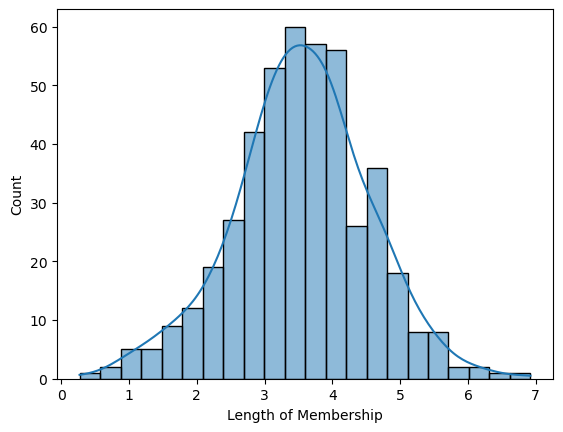

In [15]:
num_cols = x_train.select_dtypes(include='number').columns
for col in num_cols:
    sns.histplot(x=x_train[col], kde=True)
    plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22696\1638836972.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

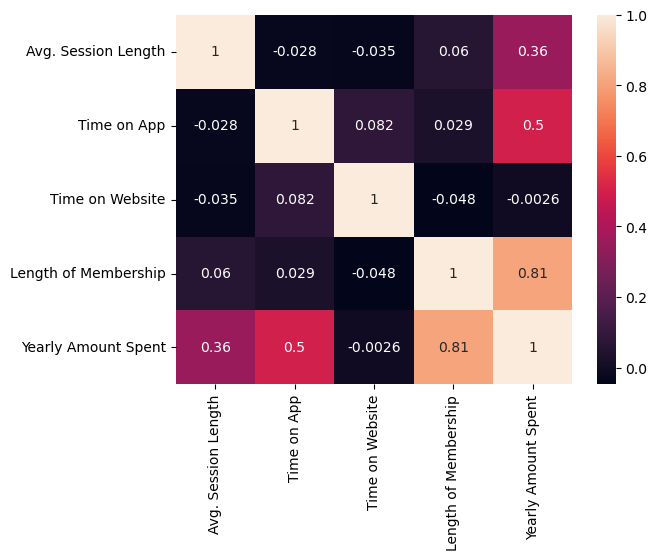

In [16]:
# bi-variate
sns.heatmap(df.corr(), annot=True)

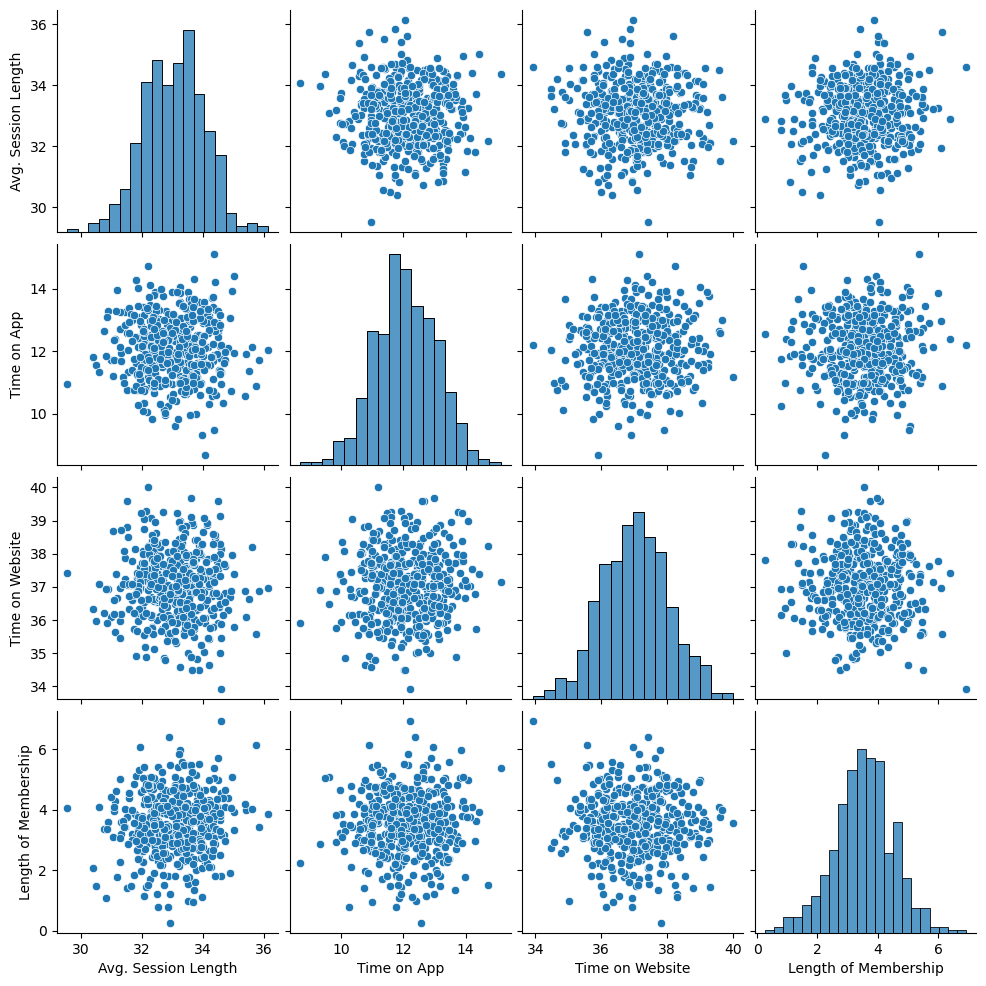

In [17]:
# multi-variate
sns.pairplot(x_train)

In [18]:
x_train.drop('member_cat', axis=1, inplace=True)
x_test.drop('member_cat', axis=1, inplace=True)

# pre-processing

In [19]:
# duplicates
# train_test_split
# detect and handle NaNs
x_train.isna().sum()

Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
dtype: int64

In [20]:
x_train.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [21]:
median_imputer = SimpleImputer(strategy='median')
x_train[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']] = median_imputer.fit_transform(x_train[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']])
x_test[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']] = median_imputer.transform(x_test[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']])


mode_imputer = SimpleImputer(strategy='most_frequent')
x_train[['Avatar']] = mode_imputer.fit_transform(x_train[['Avatar']])
x_test[['Avatar']] = mode_imputer.transform(x_test[['Avatar']])

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Yearly Amount Spent'>

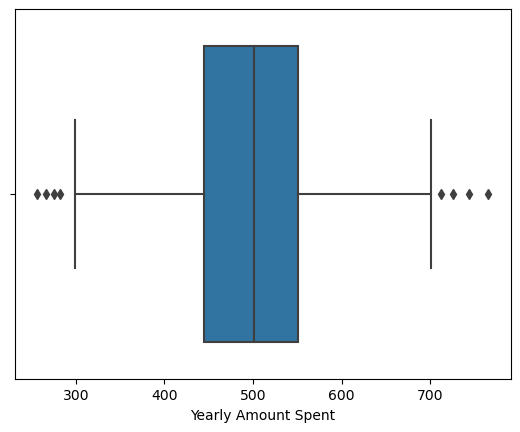

In [22]:
# detect and handle outliers
sns.boxplot(y_train)

In [23]:
# x_train
def handle_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    data[data > ub] = ub
    data[data < lb] = lb
    return data, ub, lb


def handle_outliers_test(test_data, ub_train, lb_train):
    test_data[test_data > ub_train] = ub_train
    test_data[test_data < lb_train] = lb_train
    return test_data


outliers = x_train.select_dtypes(include='number').columns
for col in outliers:
    x_train[col], ub_train, lb_train = handle_outliers(x_train[col])
    x_test[col] = handle_outliers_test(x_test[col], ub_train, lb_train) # data lekage
# NO MORE OUTLIERS

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22696\2918353483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data > ub] = ub
C:\Users\ahmed\AppData\Local\Temp\ipykernel_22696\2918353483.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data < lb] = lb
C:\Users\ahmed\AppData\Local\Temp\ipykernel_22696\2918353483.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[test_data > ub_train] = ub_train
C:\Users\ahmed

In [24]:
# y_train
y_train, ub_train, lb_train = handle_outliers(y_train)
y_test = handle_outliers_test(y_test, ub_train, lb_train) # data lekage

In [25]:
## Encoding
x_train['Avatar'].nunique()

138

In [26]:
from category_encoders import BinaryEncoder

bin_encoder = BinaryEncoder()
nominal_df = bin_encoder.fit_transform(x_train[['Avatar']])
x_train = pd.concat([x_train, nominal_df], axis=1)
x_train.drop('Avatar', axis=1, inplace=True)

nominal_df_test = bin_encoder.transform(x_test[['Avatar']])
x_test = pd.concat([x_test, nominal_df_test], axis=1)
x_test.drop('Avatar', axis=1, inplace=True)

In [27]:
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Avatar_0,Avatar_1,Avatar_2,Avatar_3,Avatar_4,Avatar_5,Avatar_6,Avatar_7
64,32.772610,13.276313,36.600777,3.462299,0,0,0,0,0,0,0,1
430,33.749228,11.137140,38.401374,4.595523,0,0,0,0,0,0,1,0
202,31.525752,11.340036,37.039514,3.811248,0,0,0,0,0,0,1,1
195,31.820998,10.771074,37.278640,3.519032,0,0,0,0,0,1,0,0
89,32.605584,12.068816,36.105000,3.917451,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
55,33.925297,11.588655,35.252242,3.392050,0,1,0,0,1,0,1,1
449,32.675155,12.594194,37.683875,2.571778,0,1,1,1,0,1,0,1
199,30.836433,13.100110,35.907721,3.361613,0,0,1,0,1,1,0,1
356,33.672758,13.420546,37.763690,4.794312,0,1,1,1,1,0,1,0


In [28]:
# no imbalanced

In [29]:
# solver dist: using rbf_kernel

In [30]:
# scaling
from sklearn.preprocessing import StandardScaler
num_cols = ["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]

std_scaler = StandardScaler()
x_train[num_cols] = std_scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = std_scaler.transform(x_test[num_cols])

In [31]:
x_train.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Avatar_0,Avatar_1,Avatar_2,Avatar_3,Avatar_4,Avatar_5,Avatar_6,Avatar_7
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,1.746751e-15,-1.286872e-15,7.200166e-15,4.144833e-17,0.053333,0.408889,0.451111,0.440000,0.493333,0.542222,0.515556,0.500000
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,0.224947,0.492176,0.498158,0.496939,0.500512,0.498769,0.500314,0.500556
min,-2.801511e+00,-2.807467e+00,-2.740500e+00,-2.441977e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.201643e-01,-6.888140e-01,-7.124398e-01,-6.143044e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257237e-02,-5.823103e-02,1.232433e-02,3.097762e-05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000
75%,6.674002e-01,7.236210e-01,6.396005e-01,6.041441e-01,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.748747e+00,2.842274e+00,2.667661e+00,2.431817e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling

In [32]:
from sklearn.linear_model import LinearRegression # if data is small and can fit in my memory / offline learning
from sklearn.linear_model import SGDRegressor # if data is large / online learning
model = LinearRegression()
model

LinearRegression()

In [33]:
model.fit(x_train, y_train)

LinearRegression()

In [34]:
model.coef_

array([25.44486271, 37.69231426,  0.50753449, 60.90265363,  2.29224024,
        1.92219157,  1.35422495, -0.6453272 ,  1.76435703,  0.15918064,
       -0.28813723,  0.55605475])

In [35]:
model.intercept_

497.1343749610784

In [36]:
# std_scaler.inverse_transform: # if y_train was scaled so inverse_transform(predicted_data)
model.score(x_train, y_train)

0.9814438341966655

In [37]:
model.score(x_test, y_test)

0.9823066595574065

In [38]:
y_train_predicted = model.predict(x_train)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_score(y_true=y_train, y_pred=y_train_predicted)

0.9814438341966655

In [39]:
mean_squared_error(y_true=y_train, y_pred=y_train_predicted) # L2 - norm: no outliers

114.87341246994828

In [40]:
np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_predicted)) # actual error

10.717901495626291

In [41]:
mean_absolute_error(y_true=y_train, y_pred=y_train_predicted) # L1 - norm: if outliers exsist

8.23484282682687